<a href="https://colab.research.google.com/github/GuilleLondero/challenge_one_DS_telecomX/blob/main/ChallengerTelecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**📌 Extracción**

In [103]:
# 1. Importar las bibliotecas necesarias
import pandas as pd
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy import stats
from scipy.stats import mannwhitneyu, ttest_ind
from matplotlib.patches import Wedge
import warnings
warnings.filterwarnings('ignore')

# 2. URL de la API de TelecomX
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

# 3. Realizo la petición HTTP para obtener los datos
try:
  response = requests.get(url)  # Obtengo los Datos mediante el metodo HTPP get
  response.raise_for_status()   # Lanza excepción si hay error HTTP
  data = response.json()        # Convierto la respuesta JSON a un diccionario de Python

  df = pd.DataFrame(data)       # Convierto los datos a DataFrame de Pandas

except requests.exceptions.RequestException as e:
    print(f" Error al descargar los datos: {e}")
except json.JSONDecodeError as e:
    print(f" Error al procesar JSON: {e}")
except Exception as e:
    print(f" Error inesperado: {e}")

# 4. Muestro el data frame obtenido
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


## **Normalizando el Data Frame:**

In [104]:
df_normalize = pd.json_normalize(data)
df_normalize

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


# **Comprensión del DataSet**

In [105]:
# 1. Mostrar información básica del DataFrame
df_normalize.shape

(7267, 21)

In [106]:
# 2. Información detallada del DataFrame
df_normalize.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [107]:
# 3. Explorar la columna target (Churn (Fuga)) - Variable objetivo
df_normalize['Churn'].value_counts() # Distribución de clientes que se fueron vs se quedaron

,count
Churn,
No,5174
Yes,1869
,224


In [108]:
# 3.1 Ver todos los valores únicos en Churn
df_normalize['Churn'].unique()

array(['No', 'Yes', ''], dtype=object)

Tenemos 224 registros "misteriosos":
Los valores únicos son: ['No', 'Yes', " "]
¡Aquí tenemos un problema! Hay 224 registros con valores vacíos ('') en la columna Churn.

Lo que significa:

🟢 'No' = 5174 → Clientes que se quedaron

🔴 'Yes' = 1869 → Clientes que se fueron

⚠️ '' (vacío) = 224 → Registros sin información de Churn

In [109]:
# 3.2. Porcentaje de distribución de Churn
churn_porcentajes = df_normalize['Churn'].value_counts(normalize=True) * 100 # Porcentajes para entender el balance
churn_porcentajes.round(2)

,proportion
Churn,
No,71.20
Yes,25.72
,3.08


### Interpretación empresarial del resultado anterior:
🎯 Tasa de Churn = 25.72% es MUY ALTA para telecomunicaciones

📊 Retención = 71.20% podría mejorar significativamente

⚠️ 3.08% sin datos necesita limpieza

¿Qué significa esto?
**De cada 100 clientes, aproximadamente 26 se van cada período.**

Esta tasa de churn es preocupante. ***El objetivo será identificar qué factores llevan a ese 25.72% a irse***

## **🧹 Calidad de los datos**

In [110]:
# 1. Verifo, en el total de las columnas, si hay valores únicos en cada columna

for col in df_normalize.columns:
  print(f"valores únicos en la columna'{col}': {df_normalize[col].nunique()}")
  if df_normalize[col].nunique() < 20: # imprimir solo si son menos de 20 valores
    print(df_normalize[col].unique())
    print('-' * 50)  # Línea divisoria para mejor visualización de los datos

valores únicos en la columna'customerID': 7267
valores únicos en la columna'Churn': 3
['No' 'Yes' '']
--------------------------------------------------
valores únicos en la columna'customer.gender': 2
['Female' 'Male']
--------------------------------------------------
valores únicos en la columna'customer.SeniorCitizen': 2
[0 1]
--------------------------------------------------
valores únicos en la columna'customer.Partner': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'customer.Dependents': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'customer.tenure': 73
valores únicos en la columna'phone.PhoneService': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'phone.MultipleLines': 3
['No' 'Yes' 'No phone service']
--------------------------------------------------
valores únicos en la columna'internet.InternetService': 3
['DSL' 'Fiber optic' 'No'

In [111]:
# 2. Verifico Números duplicados

duplicados = df_normalize.duplicated()
print("Numero de duplicados: ", duplicados.sum())

Numero de duplicados:  0


In [112]:
# 3. Verifico Valores nulos

valores_nulos = df_normalize.isnull().sum()

print(f' Valores nulos por columna:\n\n {valores_nulos}')

 Valores nulos por columna:

 customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


In [113]:
# 4.Verifico valores en blanco o vacios

valores_vacios = df_normalize.apply(lambda x: x.astype(str).str.strip() == '').sum()

print(f' Valores vacios por columna:\n\n {valores_vacios}')

 Valores vacios por columna:

 customerID                     0
Churn                        224
customer.gender                0
customer.SeniorCitizen         0
customer.Partner               0
customer.Dependents            0
customer.tenure                0
phone.PhoneService             0
phone.MultipleLines            0
internet.InternetService       0
internet.OnlineSecurity        0
internet.OnlineBackup          0
internet.DeviceProtection      0
internet.TechSupport           0
internet.StreamingTV           0
internet.StreamingMovies       0
account.Contract               0
account.PaperlessBilling       0
account.PaymentMethod          0
account.Charges.Monthly        0
account.Charges.Total         11
dtype: int64


# **🔧 Transformación**

In [114]:
# 1. Eliminando las columnas vacias de Churn

df_normalize = df_normalize[df_normalize['Churn'].str.strip() != '']
print("Número de filas después de eliminar las vacías en 'Churn':", len(df_normalize))

Número de filas después de eliminar las vacías en 'Churn': 7043


In [115]:
#2 . Cambiando la columna "account.Charges.Total" a Float

df_normalize['account.Charges.Total'] = pd.to_numeric(df_normalize['account.Charges.Total'], errors='coerce')
print(df_normalize['account.Charges.Total'].dtype)

float64


In [116]:
valores_vacios = df_normalize.apply(lambda x: x.astype(str).str.strip() == '').sum()

print(f' Valores vacios por columna:\n\n {valores_vacios}')

 Valores vacios por columna:

 customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


In [117]:
# 3. CREAR LA COLUMNA CUENTAS_DIARIAS
# Dividir la facturación mensual entre 30 días (promedio de días por mes)
df_normalize['Cuentas_Diarias'] = df_normalize['account.Charges.Monthly'] / 30
df_normalize['Cuentas_Diarias'] = df_normalize['Cuentas_Diarias'].round(2)


print(df_normalize[['account.Charges.Monthly', 'Cuentas_Diarias']])
df_normalize = df_normalize.drop('Cuentas_Diarias', errors='ignore')

      account.Charges.Monthly  Cuentas_Diarias
0                       65.60             2.19
1                       59.90             2.00
2                       73.90             2.46
3                       98.00             3.27
4                       83.90             2.80
...                       ...              ...
7262                    55.15             1.84
7263                    85.10             2.84
7264                    50.30             1.68
7265                    67.85             2.26
7266                    59.00             1.97

[7043 rows x 2 columns]


In [118]:
# 4. VERIFICAR SI HAY VALORES NULOS EN LA NUEVA COLUMNA
df_normalize['Cuentas_Diarias'].isnull().sum()

np.int64(0)

In [119]:
df_normalize

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.84
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.84
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.68
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.26


## 5. Estandarización y transformación de datos


In [120]:
# 5.1. TRANSFORMACIÓN DE VARIABLES CATEGÓRICAS A BINARIAS
# Identificar columnas con valores Yes/No
yes_no_columns = []
for col in df_normalize.columns:
    if df_normalize[col].dtype == 'object':
        unique_vals = df_normalize[col].unique()
        if set(['Yes', 'No']).issubset(set(unique_vals)):
            yes_no_columns.append(col)

yes_no_columns

['Churn',
 'customer.Partner',
 'customer.Dependents',
 'phone.PhoneService',
 'phone.MultipleLines',
 'internet.OnlineSecurity',
 'internet.OnlineBackup',
 'internet.DeviceProtection',
 'internet.TechSupport',
 'internet.StreamingTV',
 'internet.StreamingMovies',
 'account.PaperlessBilling']

In [121]:
# 5.2. Verifico qué valores únicos tengo

print("VALORES ÚNICOS EN CADA COLUMNA: \n")

for col in yes_no_columns:
    if col in df_normalize.columns:
        unique_vals = df_normalize[col].unique()
        print(f"{col}: {unique_vals}")

VALORES ÚNICOS EN CADA COLUMNA: 

Churn: ['No' 'Yes']
customer.Partner: ['Yes' 'No']
customer.Dependents: ['Yes' 'No']
phone.PhoneService: ['Yes' 'No']
phone.MultipleLines: ['No' 'Yes' 'No phone service']
internet.OnlineSecurity: ['No' 'Yes' 'No internet service']
internet.OnlineBackup: ['Yes' 'No' 'No internet service']
internet.DeviceProtection: ['No' 'Yes' 'No internet service']
internet.TechSupport: ['Yes' 'No' 'No internet service']
internet.StreamingTV: ['Yes' 'No' 'No internet service']
internet.StreamingMovies: ['No' 'Yes' 'No internet service']
account.PaperlessBilling: ['Yes' 'No']


In [122]:
# 5.3. Mapeo explícito que maneja todos los casos
for col in yes_no_columns:
    if col in df_normalize.columns:
        # Mapeo que convierte 'No internet service' y 'No phone service' a 0
        df_normalize[col] = df_normalize[col].map({
            'Yes': 1,
            'No': 0,
            'No internet service': 0,  # Considerado como "No tiene el servicio" = 0
            'No phone service': 0      # Considerado como "No tiene el servicio" = 0
        })

        # Verificar si quedaron valores NaN (valores no mapeados)
        if df_normalize[col].isna().any():
            print(f"⚠️  ADVERTENCIA: {col} tiene valores no mapeados:")
            print(f"   Valores únicos: {df_normalize[col].value_counts(dropna=False)}")
        else:
            print(f"✅ {col}: Mapeo exitoso")

✅ Churn: Mapeo exitoso
✅ customer.Partner: Mapeo exitoso
✅ customer.Dependents: Mapeo exitoso
✅ phone.PhoneService: Mapeo exitoso
✅ phone.MultipleLines: Mapeo exitoso
✅ internet.OnlineSecurity: Mapeo exitoso
✅ internet.OnlineBackup: Mapeo exitoso
✅ internet.DeviceProtection: Mapeo exitoso
✅ internet.TechSupport: Mapeo exitoso
✅ internet.StreamingTV: Mapeo exitoso
✅ internet.StreamingMovies: Mapeo exitoso
✅ account.PaperlessBilling: Mapeo exitoso


In [123]:
# 5.4. RENOMBRAMIENTO DE COLUMNAS A ESPAÑOL
df_normalize.rename(columns={
    'customerID': 'Id_Cliente',
    'Churn': 'Fuga_Cliente',
    'customer.gender': 'Genero',
    'customer.SeniorCitizen': 'Ciudadano_Mayor',
    'customer.Partner': 'Tiene_Pareja',
    'customer.Dependents': 'Tiene_Dependientes',
    'customer.tenure': 'Antiguedad_Meses',
    'phone.PhoneService': 'Servicio_Telefono',
    'phone.MultipleLines': 'Lineas_Multiples',
    'internet.InternetService': 'Servicio_Internet',
    'internet.OnlineSecurity': 'Seguridad_Online',
    'internet.OnlineBackup': 'Respaldo_Online',
    'internet.DeviceProtection': 'Proteccion_Dispositivo',
    'internet.TechSupport': 'Soporte_Tecnico',
    'internet.StreamingTV': 'TV_Streaming',
    'internet.StreamingMovies': 'Peliculas_Streaming',
    'account.Contract': 'Tipo_Contrato',
    'account.PaperlessBilling': 'Facturacion_Digital',
    'account.PaymentMethod': 'Metodo_Pago',
    'account.Charges.Monthly': 'Cargo_Mensual',
    'account.Charges.Total': 'Cargo_Total',
    'Cuentas_Diarias': 'Cargo_Diario'
    }, inplace=True)

In [124]:
df_normalize.head()

,Id_Cliente,Fuga_Cliente,Genero,Ciudadano_Mayor,Tiene_Pareja,Tiene_Dependientes,Antiguedad_Meses,Servicio_Telefono,Lineas_Multiples,Servicio_Internet,...,Proteccion_Dispositivo,Soporte_Tecnico,TV_Streaming,Peliculas_Streaming,Tipo_Contrato,Facturacion_Digital,Metodo_Pago,Cargo_Mensual,Cargo_Total,Cargo_Diario
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80


#**📊 Carga y análisis**

## **Análisis Descriptivo**

In [125]:
df_normalize.describe()

,Fuga_Cliente,Ciudadano_Mayor,Tiene_Pareja,Tiene_Dependientes,Antiguedad_Meses,Servicio_Telefono,Lineas_Multiples,Seguridad_Online,Respaldo_Online,Proteccion_Dispositivo,Soporte_Tecnico,TV_Streaming,Peliculas_Streaming,Facturacion_Digital,Cargo_Mensual,Cargo_Total,Cargo_Diario
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2283.300441,2.158675
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,2266.771362,1.003088
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.610000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,401.450000,1.180000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,2.340000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3794.737500,2.990000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.960000


In [126]:
df_normalize.shape


(7043, 22)

## **Distribución de evasión**

📊 ANÁLISIS DE DISTRIBUCIÓN DE EVASIÓN DE CLIENTES

📋 1. ESTADÍSTICAS DESCRIPTIVAS DE FUGA_CLIENTE
--------------------------------------------------
Conteo absoluto:
  Clientes que SE QUEDARON (0): 5,174
  Clientes que SE FUERON (1):   1,869
  TOTAL:                        7,043

Porcentajes:
  Clientes que SE QUEDARON: 73.46%
  Clientes que SE FUERON:   26.54%

Tasa de Fuga/Evasión: 26.54%

📊 2. GENERANDO VISUALIZACIONES
--------------------------------------------------


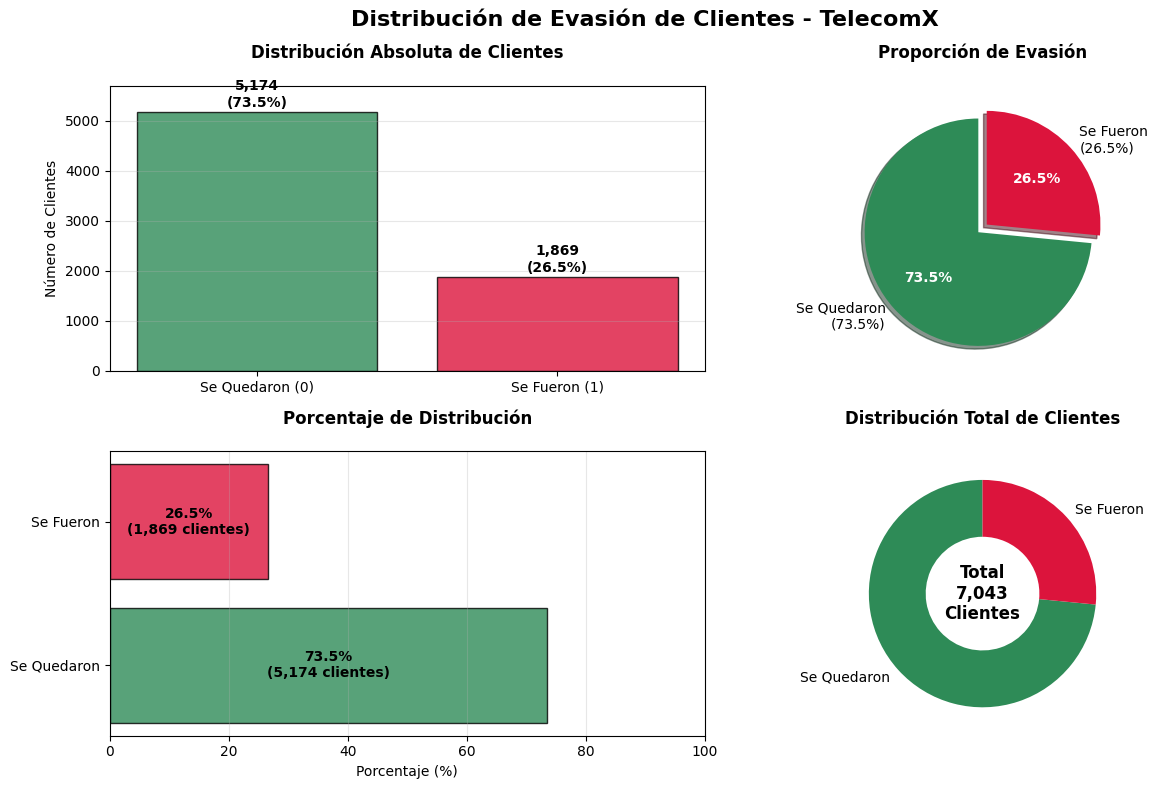

In [140]:
# Configuración de estilo
plt.style.use('default')
sns.set_palette("husl")

print("📊 ANÁLISIS DE DISTRIBUCIÓN DE EVASIÓN DE CLIENTES")
print("="*60)


# 1. ANÁLISIS DESCRIPTIVO BÁSICO

print("\n📋 1. ESTADÍSTICAS DESCRIPTIVAS DE FUGA_CLIENTE")
print("-" * 50)

# Conteo de valores
conteo_fuga = df_normalize['Fuga_Cliente'].value_counts().sort_index()
porcentajes = df_normalize['Fuga_Cliente'].value_counts(normalize=True).sort_index() * 100

print("Conteo absoluto:")
print(f"  Clientes que SE QUEDARON (0): {conteo_fuga[0]:,}")
print(f"  Clientes que SE FUERON (1):   {conteo_fuga[1]:,}")
print(f"  TOTAL:                        {conteo_fuga.sum():,}")

print(f"\nPorcentajes:")
print(f"  Clientes que SE QUEDARON: {porcentajes[0]:.2f}%")
print(f"  Clientes que SE FUERON:   {porcentajes[1]:.2f}%")

print(f"\nTasa de Fuga/Evasión: {porcentajes[1]:.2f}%")

# 2. VISUALIZACIONES MÚLTIPLES

print(f"\n📊 2. GENERANDO VISUALIZACIONES")
print("-" * 50)

# Crear figura con múltiples subplots
fig, axes = plt.subplots(2, 2, figsize=(13, 8))
fig.suptitle('Distribución de Evasión de Clientes - TelecomX', fontsize=16, fontweight='bold')

# Colores personalizados
colores = ['#2E8B57', '#DC143C']  # Verde para quedaron, Rojo para se fueron
labels = ['Se Quedaron', 'Se Fueron']


# 2.1 GRÁFICO DE BARRAS

ax1 = axes[0, 0]
bars = ax1.bar(['Se Quedaron (0)', 'Se Fueron (1)'], conteo_fuga.values,
               color=colores, alpha=0.8, edgecolor='black', linewidth=1)

# Añadir valores en las barras
for i, (bar, valor) in enumerate(zip(bars, conteo_fuga.values)):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 50,
             f'{valor:,}\n({porcentajes.iloc[i]:.1f}%)',
             ha='center', va='bottom', fontweight='bold', fontsize=10)

ax1.set_title('Distribución Absoluta de Clientes', fontweight='bold', pad=20)
ax1.set_ylabel('Número de Clientes')
ax1.grid(axis='y', alpha=0.3)
ax1.set_ylim(0, max(conteo_fuga.values) * 1.1)


# 2.2 GRÁFICO DE TORTA

ax2 = axes[0, 1]
wedges, texts, autotexts = ax2.pie(conteo_fuga.values,
                                   labels=[f'{label}\n({porcentajes.iloc[i]:.1f}%)'
                                          for i, label in enumerate(labels)],
                                   colors=colores, autopct='%1.1f%%',
                                   startangle=90, explode=(0.05, 0.05),
                                   shadow=True)

# Mejorar formato del grafico
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(10)

ax2.set_title('Proporción de Evasión', fontweight='bold', pad=20)


# 2.3 GRÁFICO DE BARRAS HORIZONTALES CON PORCENTAJES

ax3 = axes[1, 0]
bars_h = ax3.barh(['Se Quedaron', 'Se Fueron'], porcentajes.values,
                  color=colores, alpha=0.8, edgecolor='black', linewidth=1)

# Añadir porcentajes en las barras
for i, (bar, valor) in enumerate(zip(bars_h, porcentajes.values)):
    width = bar.get_width()
    ax3.text(width/2, bar.get_y() + bar.get_height()/2,
             f'{valor:.1f}%\n({conteo_fuga.iloc[i]:,} clientes)',
             ha='center', va='center', fontweight='bold', fontsize=10)

ax3.set_title('Porcentaje de Distribución', fontweight='bold', pad=20)
ax3.set_xlabel('Porcentaje (%)')
ax3.grid(axis='x', alpha=0.3)
ax3.set_xlim(0, 100)


# 2.4 GRÁFICO DE DONA

ax4 = axes[1, 1]
# Crear dona
wedges, texts = ax4.pie(conteo_fuga.values, labels=labels, colors=colores,
                        startangle=90, wedgeprops=dict(width=0.5))

# Añadir texto en el centro
ax4.text(0, 0, f'Total\n{conteo_fuga.sum():,}\nClientes',
         ha='center', va='center', fontweight='bold', fontsize=12)

ax4.set_title('Distribución Total de Clientes', fontweight='bold', pad=20)

# Ajustar layout
plt.tight_layout()
plt.show()

In [128]:
# 3. ANÁLISIS INTERPRETATIVO

print(f"\n📈 3. INTERPRETACIÓN DE RESULTADOS")
print("-" * 50)

tasa_churn = porcentajes[1]
clientes_perdidos = conteo_fuga[1]
clientes_retenidos = conteo_fuga[0]

print(f"🔍 HALLAZGOS CLAVE:")
print(f"   • Tasa de Churn: {tasa_churn:.2f}% - {'ALTA' if tasa_churn > 20 else 'MODERADA' if tasa_churn > 10 else 'BAJA'}")
print(f"   • Clientes perdidos: {clientes_perdidos:,}")
print(f"   • Clientes retenidos: {clientes_retenidos:,}")
print(f"   • Ratio retención: {clientes_retenidos/clientes_perdidos:.1f}:1")

print(f"\n💰 IMPACTO ESTIMADO:")
# Usando la media del cargo mensual para estimar impacto
cargo_promedio = df_normalize['Cargo_Mensual'].mean()
perdida_mensual = clientes_perdidos * cargo_promedio
print(f"   • Pérdida mensual estimada: ${perdida_mensual:,.2f}")
print(f"   • Pérdida anual estimada: ${perdida_mensual * 12:,.2f}")

print(f"\n🎯 BENCHMARKING INDUSTRIA:")
if tasa_churn > 25:
    benchmark = "🔴 MUY ALTA - Requiere acción inmediata"
elif tasa_churn > 20:
    benchmark = "🟠 ALTA - Por encima del promedio de telecomunicaciones (15-20%)"
elif tasa_churn > 15:
    benchmark = "🟡 MODERADA - Dentro del rango típico de telecomunicaciones"
else:
    benchmark = "🟢 BAJA - Excelente retención de clientes"

print(f"   • {benchmark}")

print(f"\n📊 RESUMEN ESTADÍSTICO:")
print(f"   • Media de Fuga_Cliente: {df_normalize['Fuga_Cliente'].mean():.4f}")
print(f"   • Desviación estándar: {df_normalize['Fuga_Cliente'].std():.4f}")
print(f"   • Varianza: {df_normalize['Fuga_Cliente'].var():.4f}")


# 4. RECOMENDACIONES INICIALES

print(f"\n🚀 4. RECOMENDACIONES PRELIMINARES")
print("-" * 50)

print(f"📋 BASADO EN LA DISTRIBUCIÓN:")
if tasa_churn > 20:
    print(f"   1. ⚠️  URGENTE: Implementar programa de retención inmediato")
    print(f"   2. 🔍 Identificar patrones en los {clientes_perdidos:,} clientes que se fueron")
    print(f"   3. 📞 Contacto proactivo con clientes en riesgo")
    print(f"   4. 💡 Revisar estrategia de precios y servicios")
else:
    print(f"   1. ✅ Mantener estrategias actuales de retención")
    print(f"   2. 🔍 Identificar mejores prácticas para replicar")


📈 3. INTERPRETACIÓN DE RESULTADOS
--------------------------------------------------
🔍 HALLAZGOS CLAVE:
   • Tasa de Churn: 26.54% - ALTA
   • Clientes perdidos: 1,869
   • Clientes retenidos: 5,174
   • Ratio retención: 2.8:1

💰 IMPACTO ESTIMADO:
   • Pérdida mensual estimada: $121,039.60
   • Pérdida anual estimada: $1,452,475.24

🎯 BENCHMARKING INDUSTRIA:
   • 🔴 MUY ALTA - Requiere acción inmediata

📊 RESUMEN ESTADÍSTICO:
   • Media de Fuga_Cliente: 0.2654
   • Desviación estándar: 0.4416
   • Varianza: 0.1950

🚀 4. RECOMENDACIONES PRELIMINARES
--------------------------------------------------
📋 BASADO EN LA DISTRIBUCIÓN:
   1. ⚠️  URGENTE: Implementar programa de retención inmediato
   2. 🔍 Identificar patrones en los 1,869 clientes que se fueron
   3. 📞 Contacto proactivo con clientes en riesgo
   4. 💡 Revisar estrategia de precios y servicios


## **Recuento de evasión por variables categóricas**

📊 ANÁLISIS DE EVASIÓN POR VARIABLES CATEGÓRICAS

📋 1. PREPARACIÓN DEL ANÁLISIS
--------------------------------------------------
✅ Variables binarias a analizar: 13
✅ Variables multi-categoría: 3

📊 2. ANÁLISIS DE VARIABLES BINARIAS
--------------------------------------------------

🔍 GENERO:
   Categoría Female: 26.92% churn (939 de 3488 clientes)
   Categoría Male: 26.16% churn (930 de 3555 clientes)

🔍 CIUDADANO MAYOR:
   No Senior: 23.61% churn (1393 de 5901 clientes)
   Senior: 41.68% churn (476 de 1142 clientes)

🔍 TIENE PAREJA:
   Sin Pareja: 32.96% churn (1200 de 3641 clientes)
   Con Pareja: 19.66% churn (669 de 3402 clientes)

🔍 TIENE DEPENDIENTES:
   Sin Dependientes: 31.28% churn (1543 de 4933 clientes)
   Con Dependientes: 15.45% churn (326 de 2110 clientes)

🔍 SERVICIO TELEFONO:
   Sin Teléfono: 24.93% churn (170 de 682 clientes)
   Con Teléfono: 26.71% churn (1699 de 6361 clientes)

🔍 LINEAS MULTIPLES:
   Una Línea/Sin Tel.: 25.02% churn (1019 de 4072 clientes)
   Múlt

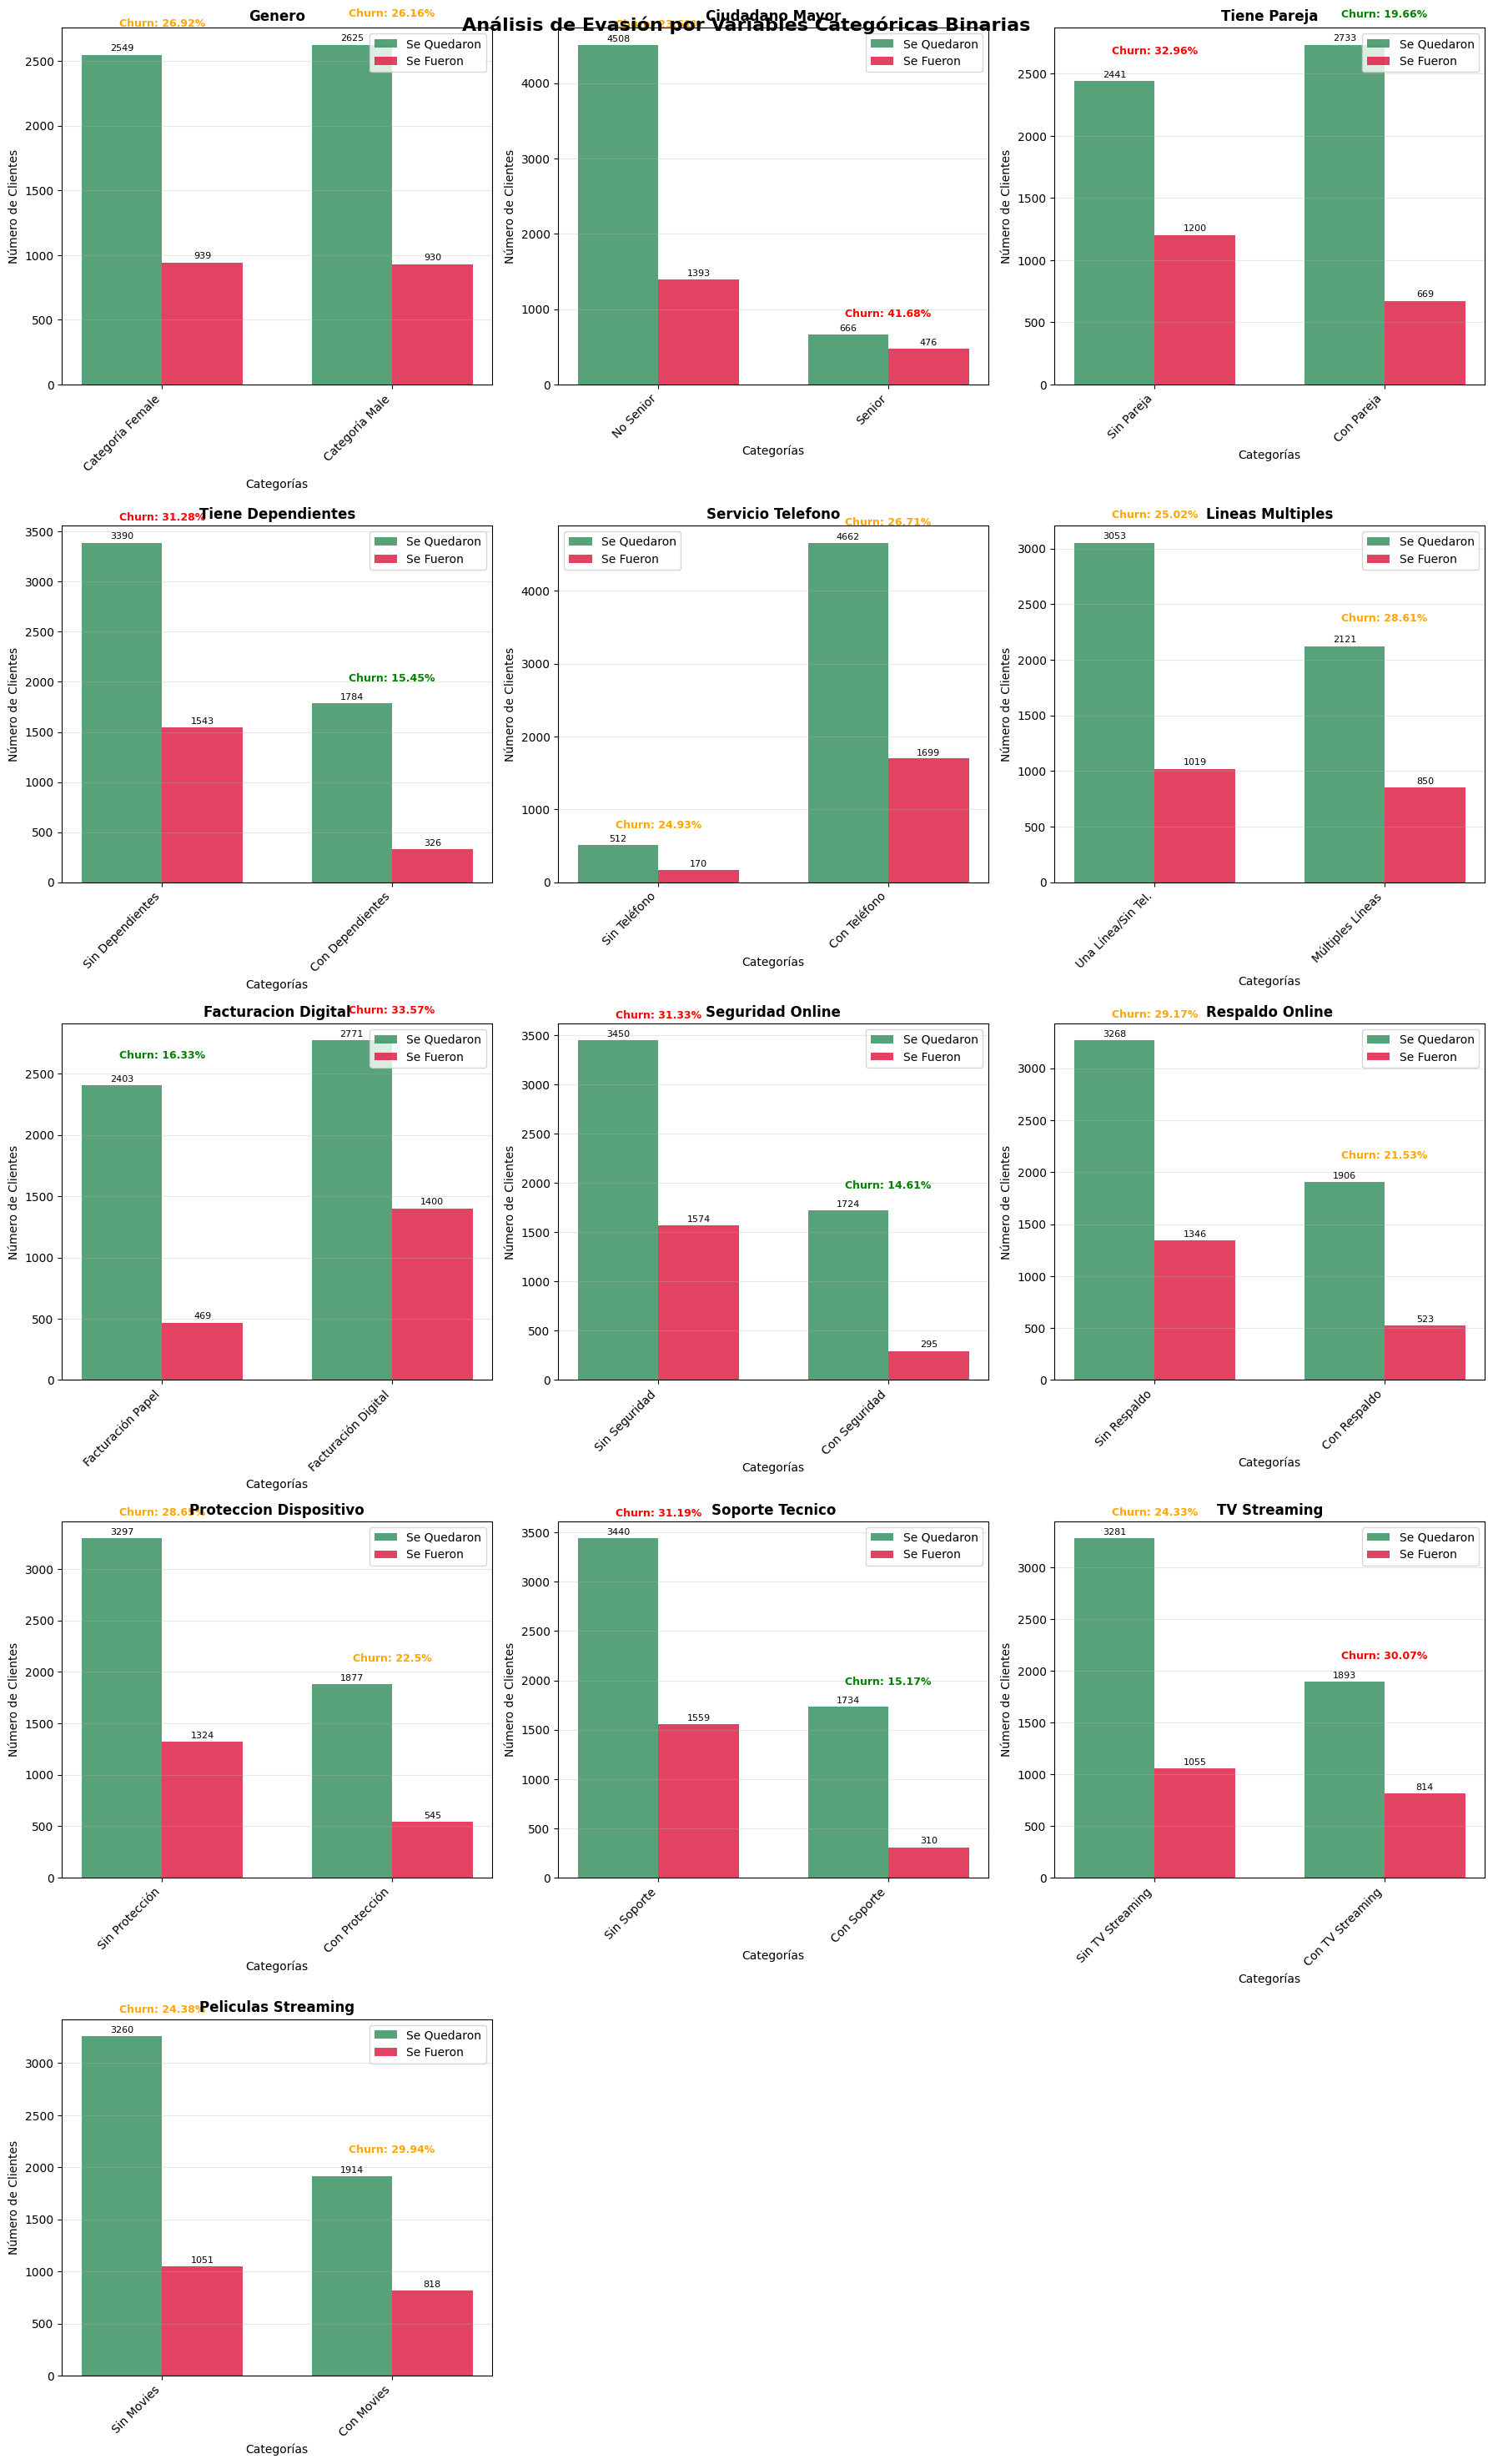

In [129]:
# Configuración de estilo
plt.style.use('default')
sns.set_palette("Set2")

print("📊 ANÁLISIS DE EVASIÓN POR VARIABLES CATEGÓRICAS")
print("="*65)


# 1. DEFINICIÓN DE VARIABLES CATEGÓRICAS A ANALIZAR

print("\n📋 1. PREPARACIÓN DEL ANÁLISIS")
print("-" * 50)

# Variables categóricas principales (ya transformadas)
variables_categoricas = {
    # Demográficas
    'Genero': {0: 'Femenino', 1: 'Masculino'},
    'Ciudadano_Mayor': {0: 'No Senior', 1: 'Senior'},
    'Tiene_Pareja': {0: 'Sin Pareja', 1: 'Con Pareja'},
    'Tiene_Dependientes': {0: 'Sin Dependientes', 1: 'Con Dependientes'},

    # Servicios
    'Servicio_Telefono': {0: 'Sin Teléfono', 1: 'Con Teléfono'},
    'Lineas_Multiples': {0: 'Una Línea/Sin Tel.', 1: 'Múltiples Líneas'},
    'Facturacion_Digital': {0: 'Facturación Papel', 1: 'Facturación Digital'},

    # Servicios adicionales
    'Seguridad_Online': {0: 'Sin Seguridad', 1: 'Con Seguridad'},
    'Respaldo_Online': {0: 'Sin Respaldo', 1: 'Con Respaldo'},
    'Proteccion_Dispositivo': {0: 'Sin Protección', 1: 'Con Protección'},
    'Soporte_Tecnico': {0: 'Sin Soporte', 1: 'Con Soporte'},
    'TV_Streaming': {0: 'Sin TV Streaming', 1: 'Con TV Streaming'},
    'Peliculas_Streaming': {0: 'Sin Movies', 1: 'Con Movies'}
}

# Variables categóricas especiales (con más de 2 categorías)
variables_especiales = {
    'Servicio_Internet': {0: 'Sin Internet', 1: 'DSL', 2: 'Fibra Óptica'},
    'Tipo_Contrato': {0: 'Mes a Mes', 1: 'Un Año', 2: 'Dos Años'},
    'Metodo_Pago': {0: 'Cheque Electrónico', 1: 'Cheque Postal',
                    2: 'Transferencia Auto', 3: 'Tarjeta Auto'}
}

print(f"✅ Variables binarias a analizar: {len(variables_categoricas)}")
print(f"✅ Variables multi-categoría: {len(variables_especiales)}")


# 2. FUNCIÓN PARA CALCULAR MÉTRICAS DE FUGA DE CLIENTES(CHURN)

def calcular_metricas_churn(df, variable, etiquetas_dict):
    """Calcula métricas detalladas de churn por categoría"""

    # Crear tabla de contingencia
    contingency = pd.crosstab(df[variable], df['Fuga_Cliente'], margins=True)

    # Calcular porcentajes
    porcentajes = pd.crosstab(df[variable], df['Fuga_Cliente'], normalize='index') * 100

    # Crear DataFrame de resultados
    resultados = []
    for categoria in contingency.index[:-1]:  # Excluir 'All'
        total = contingency.loc[categoria, 'All']
        se_fueron = contingency.loc[categoria, 1]
        se_quedaron = contingency.loc[categoria, 0]
        tasa_churn = porcentajes.loc[categoria, 1]

        etiqueta = etiquetas_dict.get(categoria, f'Categoría {categoria}')

        resultados.append({
            'Categoria': etiqueta,
            'Total_Clientes': total,
            'Se_Quedaron': se_quedaron,
            'Se_Fueron': se_fueron,
            'Tasa_Churn_%': round(tasa_churn, 2),
            'Distribucion_%': round((total / contingency.loc['All', 'All']) * 100, 2)
        })

    return pd.DataFrame(resultados), contingency, porcentajes

# 3. ANÁLISIS DE VARIABLES BINARIAS

print(f"\n📊 2. ANÁLISIS DE VARIABLES BINARIAS")
print("-" * 50)

# Crear figura para variables binarias
n_vars = len(variables_categoricas)
n_cols = 3
n_rows = (n_vars + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6*n_rows))
fig.suptitle('Análisis de Evasión por Variables Categóricas Binarias', fontsize=16, fontweight='bold')

# Aplanar axes para fácil indexación
if n_rows == 1:
    axes = [axes]
axes_flat = [ax for row in axes for ax in (row if isinstance(row, np.ndarray) else [row])]

resultados_binarios = {}
idx = 0

for variable, etiquetas in variables_categoricas.items():
    if variable in df_normalize.columns:

        # Calcular métricas
        df_metricas, contingency, porcentajes = calcular_metricas_churn(df_normalize, variable, etiquetas)
        resultados_binarios[variable] = df_metricas

        # Crear gráfico de barras agrupadas
        ax = axes_flat[idx]

        # Datos para el gráfico
        categorias = df_metricas['Categoria'].values
        se_quedaron = df_metricas['Se_Quedaron'].values
        se_fueron = df_metricas['Se_Fueron'].values

        x = np.arange(len(categorias))
        width = 0.35

        bars1 = ax.bar(x - width/2, se_quedaron, width, label='Se Quedaron', color='#2E8B57', alpha=0.8)
        bars2 = ax.bar(x + width/2, se_fueron, width, label='Se Fueron', color='#DC143C', alpha=0.8)

        # Añadir valores en las barras
        for bars in [bars1, bars2]:
            for bar in bars:
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height + 20,
                       f'{int(height)}', ha='center', va='bottom', fontsize=8)

        # Añadir tasas de churn como texto
        for i, tasa in enumerate(df_metricas['Tasa_Churn_%']):
            ax.text(i, max(se_quedaron[i], se_fueron[i]) + 200,
                   f'Churn: {tasa}%', ha='center', va='bottom',
                   fontweight='bold', fontsize=9,
                   color='red' if tasa > 30 else 'orange' if tasa > 20 else 'green')

        ax.set_xlabel('Categorías')
        ax.set_ylabel('Número de Clientes')
        ax.set_title(f'{variable.replace("_", " ")}', fontweight='bold')
        ax.set_xticks(x)
        ax.set_xticklabels(categorias, rotation=45, ha='right')
        ax.legend()
        ax.grid(axis='y', alpha=0.3)

        # Mostrar resultados en consola
        print(f"\n🔍 {variable.replace('_', ' ').upper()}:")
        for _, row in df_metricas.iterrows():
            print(f"   {row['Categoria']}: {row['Tasa_Churn_%']}% churn ({row['Se_Fueron']} de {row['Total_Clientes']} clientes)")

        idx += 1

# Ocultar subplots vacíos
for i in range(idx, len(axes_flat)):
    axes_flat[i].set_visible(False)

plt.tight_layout()
plt.show()



📊 3. ANÁLISIS DE VARIABLES MULTI-CATEGORÍA
--------------------------------------------------

🔍 SERVICIO INTERNET:
   Categoría DSL: 18.96% churn (459 de 2421 clientes)
   Categoría Fiber optic: 41.89% churn (1297 de 3096 clientes)
   Categoría No: 7.4% churn (113 de 1526 clientes)

🔍 TIPO CONTRATO:
   Categoría Month-to-month: 42.71% churn (1655 de 3875 clientes)
   Categoría One year: 11.27% churn (166 de 1473 clientes)
   Categoría Two year: 2.83% churn (48 de 1695 clientes)

🔍 METODO PAGO:
   Categoría Bank transfer (automatic): 16.71% churn (258 de 1544 clientes)
   Categoría Credit card (automatic): 15.24% churn (232 de 1522 clientes)
   Categoría Electronic check: 45.29% churn (1071 de 2365 clientes)
   Categoría Mailed check: 19.11% churn (308 de 1612 clientes)


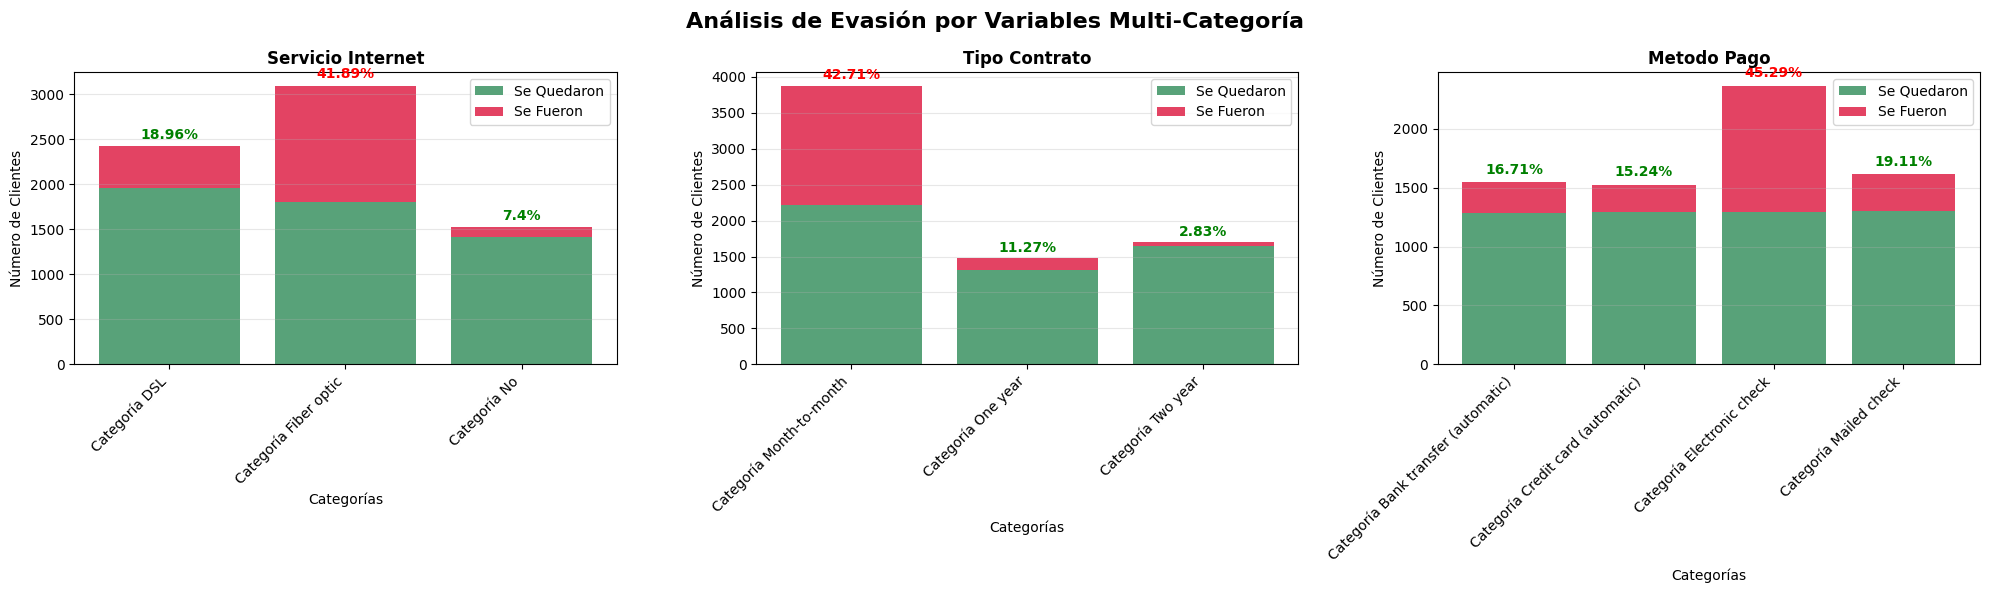

In [130]:
# 4. ANÁLISIS DE VARIABLES MULTI-CATEGORÍA

print(f"\n📊 3. ANÁLISIS DE VARIABLES MULTI-CATEGORÍA")
print("-" * 50)

fig2, axes2 = plt.subplots(1, 3, figsize=(20, 6))
fig2.suptitle('Análisis de Evasión por Variables Multi-Categoría', fontsize=16, fontweight='bold')

resultados_especiales = {}
idx2 = 0

for variable, etiquetas in variables_especiales.items():
    if variable in df_normalize.columns:

        # Calcular métricas
        df_metricas, contingency, porcentajes = calcular_metricas_churn(df_normalize, variable, etiquetas)
        resultados_especiales[variable] = df_metricas

        # Crear gráfico de barras apiladas
        ax = axes2[idx2]

        categorias = df_metricas['Categoria'].values
        se_quedaron = df_metricas['Se_Quedaron'].values
        se_fueron = df_metricas['Se_Fueron'].values

        bars1 = ax.bar(categorias, se_quedaron, label='Se Quedaron', color='#2E8B57', alpha=0.8)
        bars2 = ax.bar(categorias, se_fueron, bottom=se_quedaron, label='Se Fueron', color='#DC143C', alpha=0.8)

        # Añadir porcentajes de churn
        for i, (cat, tasa) in enumerate(zip(categorias, df_metricas['Tasa_Churn_%'])):
            total_height = se_quedaron[i] + se_fueron[i]
            ax.text(i, total_height + 50, f'{tasa}%', ha='center', va='bottom',
                   fontweight='bold', fontsize=10,
                   color='red' if tasa > 30 else 'orange' if tasa > 20 else 'green')

        ax.set_xlabel('Categorías')
        ax.set_ylabel('Número de Clientes')
        ax.set_title(f'{variable.replace("_", " ")}', fontweight='bold')
        ax.set_xticklabels(categorias, rotation=45, ha='right')
        ax.legend()
        ax.grid(axis='y', alpha=0.3)

        # Mostrar resultados en consola
        print(f"\n🔍 {variable.replace('_', ' ').upper()}:")
        for _, row in df_metricas.iterrows():
            print(f"   {row['Categoria']}: {row['Tasa_Churn_%']}% churn ({row['Se_Fueron']} de {row['Total_Clientes']} clientes)")

        idx2 += 1

plt.tight_layout()
plt.show()


In [141]:
# 5. ANÁLISIS ESTADÍSTICO - TEST CHI-CUADRADO

print(f"\n📈 4. ANÁLISIS ESTADÍSTICO (Chi-Cuadrado)")
print("-" * 50)

print("🔬 SIGNIFICANCIA ESTADÍSTICA DE LAS ASOCIACIONES:")

# Test para variables binarias
for variable, etiquetas in {**variables_categoricas, **variables_especiales}.items():
    if variable in df_normalize.columns:
        contingency_table = pd.crosstab(df_normalize[variable], df_normalize['Fuga_Cliente'])

        if contingency_table.shape[0] > 1 and contingency_table.shape[1] > 1:
            chi2, p_value, dof, expected = chi2_contingency(contingency_table)

            significancia = "✅ SIGNIFICATIVO" if p_value < 0.05 else "❌ NO SIGNIFICATIVO"
            print(f"   {variable}: p-value = {p_value:.6f} {significancia}")


# 6. RANKING DE VARIABLES POR IMPACTO EN CHURN

print(f"\n🏆 5. RANKING DE VARIABLES POR IMPACTO EN CHURN")
print("-" * 50)

# Recopilar todas las tasas de churn máximas por variable
ranking_impacto = []

for variable, df_metricas in {**resultados_binarios, **resultados_especiales}.items():
    tasa_max = df_metricas['Tasa_Churn_%'].max()
    tasa_min = df_metricas['Tasa_Churn_%'].min()
    diferencia = tasa_max - tasa_min

    categoria_riesgo = df_metricas.loc[df_metricas['Tasa_Churn_%'].idxmax(), 'Categoria']
    clientes_riesgo = df_metricas.loc[df_metricas['Tasa_Churn_%'].idxmax(), 'Total_Clientes']

    ranking_impacto.append({
        'Variable': variable.replace('_', ' '),
        'Tasa_Max_%': tasa_max,
        'Tasa_Min_%': tasa_min,
        'Diferencia_%': diferencia,
        'Categoria_Riesgo': categoria_riesgo,
        'Clientes_en_Riesgo': clientes_riesgo
    })

df_ranking = pd.DataFrame(ranking_impacto).sort_values('Diferencia_%', ascending=False)

print("🎯 TOP VARIABLES CON MAYOR IMPACTO:")
for i, row in df_ranking.head(8).iterrows():
    print(f"   {i+1}. {row['Variable']}: {row['Diferencia_%']:.1f}% diferencia")
    print(f"      └─ Mayor riesgo: {row['Categoria_Riesgo']} ({row['Tasa_Max_%']:.1f}% churn)")



📈 4. ANÁLISIS ESTADÍSTICO (Chi-Cuadrado)
--------------------------------------------------
🔬 SIGNIFICANCIA ESTADÍSTICA DE LAS ASOCIACIONES:
   Genero: p-value = 0.486579 ❌ NO SIGNIFICATIVO
   Ciudadano_Mayor: p-value = 0.000000 ✅ SIGNIFICATIVO
   Tiene_Pareja: p-value = 0.000000 ✅ SIGNIFICATIVO
   Tiene_Dependientes: p-value = 0.000000 ✅ SIGNIFICATIVO
   Servicio_Telefono: p-value = 0.338783 ❌ NO SIGNIFICATIVO
   Lineas_Multiples: p-value = 0.000843 ✅ SIGNIFICATIVO
   Facturacion_Digital: p-value = 0.000000 ✅ SIGNIFICATIVO
   Seguridad_Online: p-value = 0.000000 ✅ SIGNIFICATIVO
   Respaldo_Online: p-value = 0.000000 ✅ SIGNIFICATIVO
   Proteccion_Dispositivo: p-value = 0.000000 ✅ SIGNIFICATIVO
   Soporte_Tecnico: p-value = 0.000000 ✅ SIGNIFICATIVO
   TV_Streaming: p-value = 0.000000 ✅ SIGNIFICATIVO
   Peliculas_Streaming: p-value = 0.000000 ✅ SIGNIFICATIVO
   Servicio_Internet: p-value = 0.000000 ✅ SIGNIFICATIVO
   Tipo_Contrato: p-value = 0.000000 ✅ SIGNIFICATIVO
   Metodo_Pago: p-va

In [142]:
# 7. INSIGHTS Y RECOMENDACIONES

print(f"\n💡 6. INSIGHTS CLAVE Y RECOMENDACIONES")
print("-" * 50)

print("🔍 HALLAZGOS PRINCIPALES:")

# Identificar patrones de alto riesgo
alto_riesgo = df_ranking[df_ranking['Tasa_Max_%'] > 40].head(3)
if not alto_riesgo.empty:
    print(f"   🚨 PERFILES DE ALTO RIESGO (>40% churn):")
    for _, row in alto_riesgo.iterrows():
        print(f"      • {row['Categoria_Riesgo']}: {row['Tasa_Max_%']:.1f}% churn")

# Variables con mayor diferencia
print(f"\n   📊 VARIABLES CON MAYOR SEGMENTACIÓN:")
for _, row in df_ranking.head(3).iterrows():
    print(f"      • {row['Variable']}: {row['Diferencia_%']:.1f}% diferencia entre categorías")

print(f"\n🎯 RECOMENDACIONES ESTRATÉGICAS:")
print(f"   1. 🔴 FOCO INMEDIATO: Atender perfiles con >30% churn")
print(f"   2. 📞 RETENCIÓN PROACTIVA: Contactar clientes en categorías de alto riesgo")
print(f"   3. 🎁 INCENTIVOS ESPECÍFICOS: Ofertas personalizadas por segmento")
print(f"   4. 📈 MONITOREO: Seguimiento mensual de métricas por categoría")
print(f"   5. 🔄 OPTIMIZACIÓN: Mejorar servicios en categorías problemáticas")



💡 6. INSIGHTS CLAVE Y RECOMENDACIONES
--------------------------------------------------
🔍 HALLAZGOS PRINCIPALES:
   🚨 PERFILES DE ALTO RIESGO (>40% churn):
      • Categoría Month-to-month: 42.7% churn
      • Categoría Fiber optic: 41.9% churn
      • Categoría Electronic check: 45.3% churn

   📊 VARIABLES CON MAYOR SEGMENTACIÓN:
      • Tipo Contrato: 39.9% diferencia entre categorías
      • Servicio Internet: 34.5% diferencia entre categorías
      • Metodo Pago: 30.0% diferencia entre categorías

🎯 RECOMENDACIONES ESTRATÉGICAS:
   1. 🔴 FOCO INMEDIATO: Atender perfiles con >30% churn
   2. 📞 RETENCIÓN PROACTIVA: Contactar clientes en categorías de alto riesgo
   3. 🎁 INCENTIVOS ESPECÍFICOS: Ofertas personalizadas por segmento
   4. 📈 MONITOREO: Seguimiento mensual de métricas por categoría
   5. 🔄 OPTIMIZACIÓN: Mejorar servicios en categorías problemáticas


🎯 Análisis de los Resultados
¡Los datos son fascinantes! Revelan patrones muy claros:

🔥 Descubrimientos Más Impactantes:

🚨 "Paradoja del Premium": Los clientes con fibra óptica (servicio más caro) tienen 41.9% de churn vs 7.4% en DSL

💳 "Efecto Automatización": Pago automático reduce churn dramáticamente (15.3% vs 45.3%)

📝 "Trampa de la Flexibilidad": Contratos mes a mes tienen 15x más churn que contratos largos

🎯 Variables que NO Importan:

Género: Completamente irrelevante para churn

Servicio Teléfono: No influye estadísticamente

📊 El Patrón Dominante:

Las 3 variables más críticas están relacionadas con compromiso del cliente:

Compromiso contractual (Tipo Contrato)

Compromiso tecnológico (Servicio Internet)

Compromiso de pago (Método Pago)

## **Conteo de evasión por variables numéricas**

In [133]:
# Configuración de estilo
plt.style.use('default')
sns.set_palette("Set2")

print("📊 ANÁLISIS DE EVASIÓN POR VARIABLES NUMÉRICAS")
print("="*60)


# 1. IDENTIFICACIÓN DE VARIABLES NUMÉRICAS

print("\n📋 1. IDENTIFICACIÓN DE VARIABLES NUMÉRICAS")
print("-" * 50)

# Variables numéricas principales
variables_numericas = ['Antiguedad_Meses', 'Cargo_Mensual', 'Cargo_Total', 'Cargo_Diario']

print("🔍 Variables numéricas a analizar:")
for var in variables_numericas:
    if var in df_normalize.columns:
        print(f"   ✅ {var}")
    else:
        print(f"   ❌ {var} - No encontrada")

# Verificar tipos de datos
print(f"\n📊 Información básica del dataset:")
print(f"   Total de registros: {len(df_normalize):,}")
print(f"   Clientes que se fueron (1): {df_normalize['Fuga_Cliente'].sum():,}")
print(f"   Clientes que se quedaron (0): {(df_normalize['Fuga_Cliente'] == 0).sum():,}")


# 2. ESTADÍSTICAS DESCRIPTIVAS POR GRUPO

print(f"\n📊 2. ESTADÍSTICAS DESCRIPTIVAS POR GRUPO")
print("-" * 50)

# Separar grupos
se_quedaron = df_normalize[df_normalize['Fuga_Cliente'] == 0]
se_fueron = df_normalize[df_normalize['Fuga_Cliente'] == 1]

print(f"👥 COMPARACIÓN DE GRUPOS:")
print(f"   Se Quedaron: {len(se_quedaron):,} clientes")
print(f"   Se Fueron:   {len(se_fueron):,} clientes")

# Función para análisis estadístico detallado
def analizar_variable_numerica(variable, df_total, grupo_0, grupo_1):
    """Análisis completo de una variable numérica por grupos"""

    print(f"\n🔍 ANÁLISIS: {variable.replace('_', ' ').upper()}")
    print("-" * 40)

    # Estadísticas descriptivas
    stats_0 = grupo_0[variable].describe()
    stats_1 = grupo_1[variable].describe()

    print(f"📊 ESTADÍSTICAS DESCRIPTIVAS:")
    print(f"                    Se Quedaron    Se Fueron     Diferencia")
    print(f"   Media:          {stats_0['mean']:>10.2f} {stats_1['mean']:>10.2f} {stats_1['mean']-stats_0['mean']:>12.2f}")
    print(f"   Mediana:        {stats_0['50%']:>10.2f} {stats_1['50%']:>10.2f} {stats_1['50%']-stats_0['50%']:>12.2f}")
    print(f"   Desv. Estándar: {stats_0['std']:>10.2f} {stats_1['std']:>10.2f} {stats_1['std']-stats_0['std']:>12.2f}")
    print(f"   Mínimo:         {stats_0['min']:>10.2f} {stats_1['min']:>10.2f} {stats_1['min']-stats_0['min']:>12.2f}")
    print(f"   Máximo:         {stats_0['max']:>10.2f} {stats_1['max']:>10.2f} {stats_1['max']-stats_0['max']:>12.2f}")

    # Test estadístico (Mann-Whitney U para distribuciones no normales)
    try:
        statistic, p_value = mannwhitneyu(grupo_0[variable].dropna(),
                                         grupo_1[variable].dropna(),
                                         alternative='two-sided')

        significancia = "✅ SIGNIFICATIVO" if p_value < 0.05 else "❌ NO SIGNIFICATIVO"
        print(f"\n📈 TEST MANN-WHITNEY U:")
        print(f"   p-value: {p_value:.6f} {significancia}")

        # Interpretación práctica
        diff_media = stats_1['mean'] - stats_0['mean']
        diff_percent = (diff_media / stats_0['mean']) * 100 if stats_0['mean'] != 0 else 0

        print(f"\n💡 INTERPRETACIÓN:")
        if abs(diff_percent) > 5:  # Diferencia significativa práctica
            direccion = "MAYOR" if diff_media > 0 else "MENOR"
            print(f"   Los clientes que se fueron tienen {direccion} {variable.replace('_', ' ').lower()}")
            print(f"   Diferencia: {diff_percent:+.1f}% ({diff_media:+.2f} unidades)")
        else:
            print(f"   No hay diferencia práctica significativa entre grupos")

    except Exception as e:
        print(f"   Error en test estadístico: {e}")

    return {
        'variable': variable,
        'media_quedaron': stats_0['mean'],
        'media_fueron': stats_1['mean'],
        'diferencia_media': stats_1['mean'] - stats_0['mean'],
        'diferencia_percent': ((stats_1['mean'] - stats_0['mean']) / stats_0['mean']) * 100 if stats_0['mean'] != 0 else 0,
        'p_value': p_value if 'p_value' in locals() else None
    }

# Analizar cada variable
resultados_numericos = []
for variable in variables_numericas:
    if variable in df_normalize.columns:
        resultado = analizar_variable_numerica(variable, df_normalize, se_quedaron, se_fueron)
        resultados_numericos.append(resultado)


📊 ANÁLISIS DE EVASIÓN POR VARIABLES NUMÉRICAS

📋 1. IDENTIFICACIÓN DE VARIABLES NUMÉRICAS
--------------------------------------------------
🔍 Variables numéricas a analizar:
   ✅ Antiguedad_Meses
   ✅ Cargo_Mensual
   ✅ Cargo_Total
   ✅ Cargo_Diario

📊 Información básica del dataset:
   Total de registros: 7,043
   Clientes que se fueron (1): 1,869
   Clientes que se quedaron (0): 5,174

📊 2. ESTADÍSTICAS DESCRIPTIVAS POR GRUPO
--------------------------------------------------
👥 COMPARACIÓN DE GRUPOS:
   Se Quedaron: 5,174 clientes
   Se Fueron:   1,869 clientes

🔍 ANÁLISIS: ANTIGUEDAD MESES
----------------------------------------
📊 ESTADÍSTICAS DESCRIPTIVAS:
                    Se Quedaron    Se Fueron     Diferencia
   Media:               37.57      17.98       -19.59
   Mediana:             38.00      10.00       -28.00
   Desv. Estándar:      24.11      19.53        -4.58
   Mínimo:               0.00       1.00         1.00
   Máximo:              72.00      72.00         0.00


📊 3. GENERANDO VISUALIZACIONES COMPARATIVAS
--------------------------------------------------


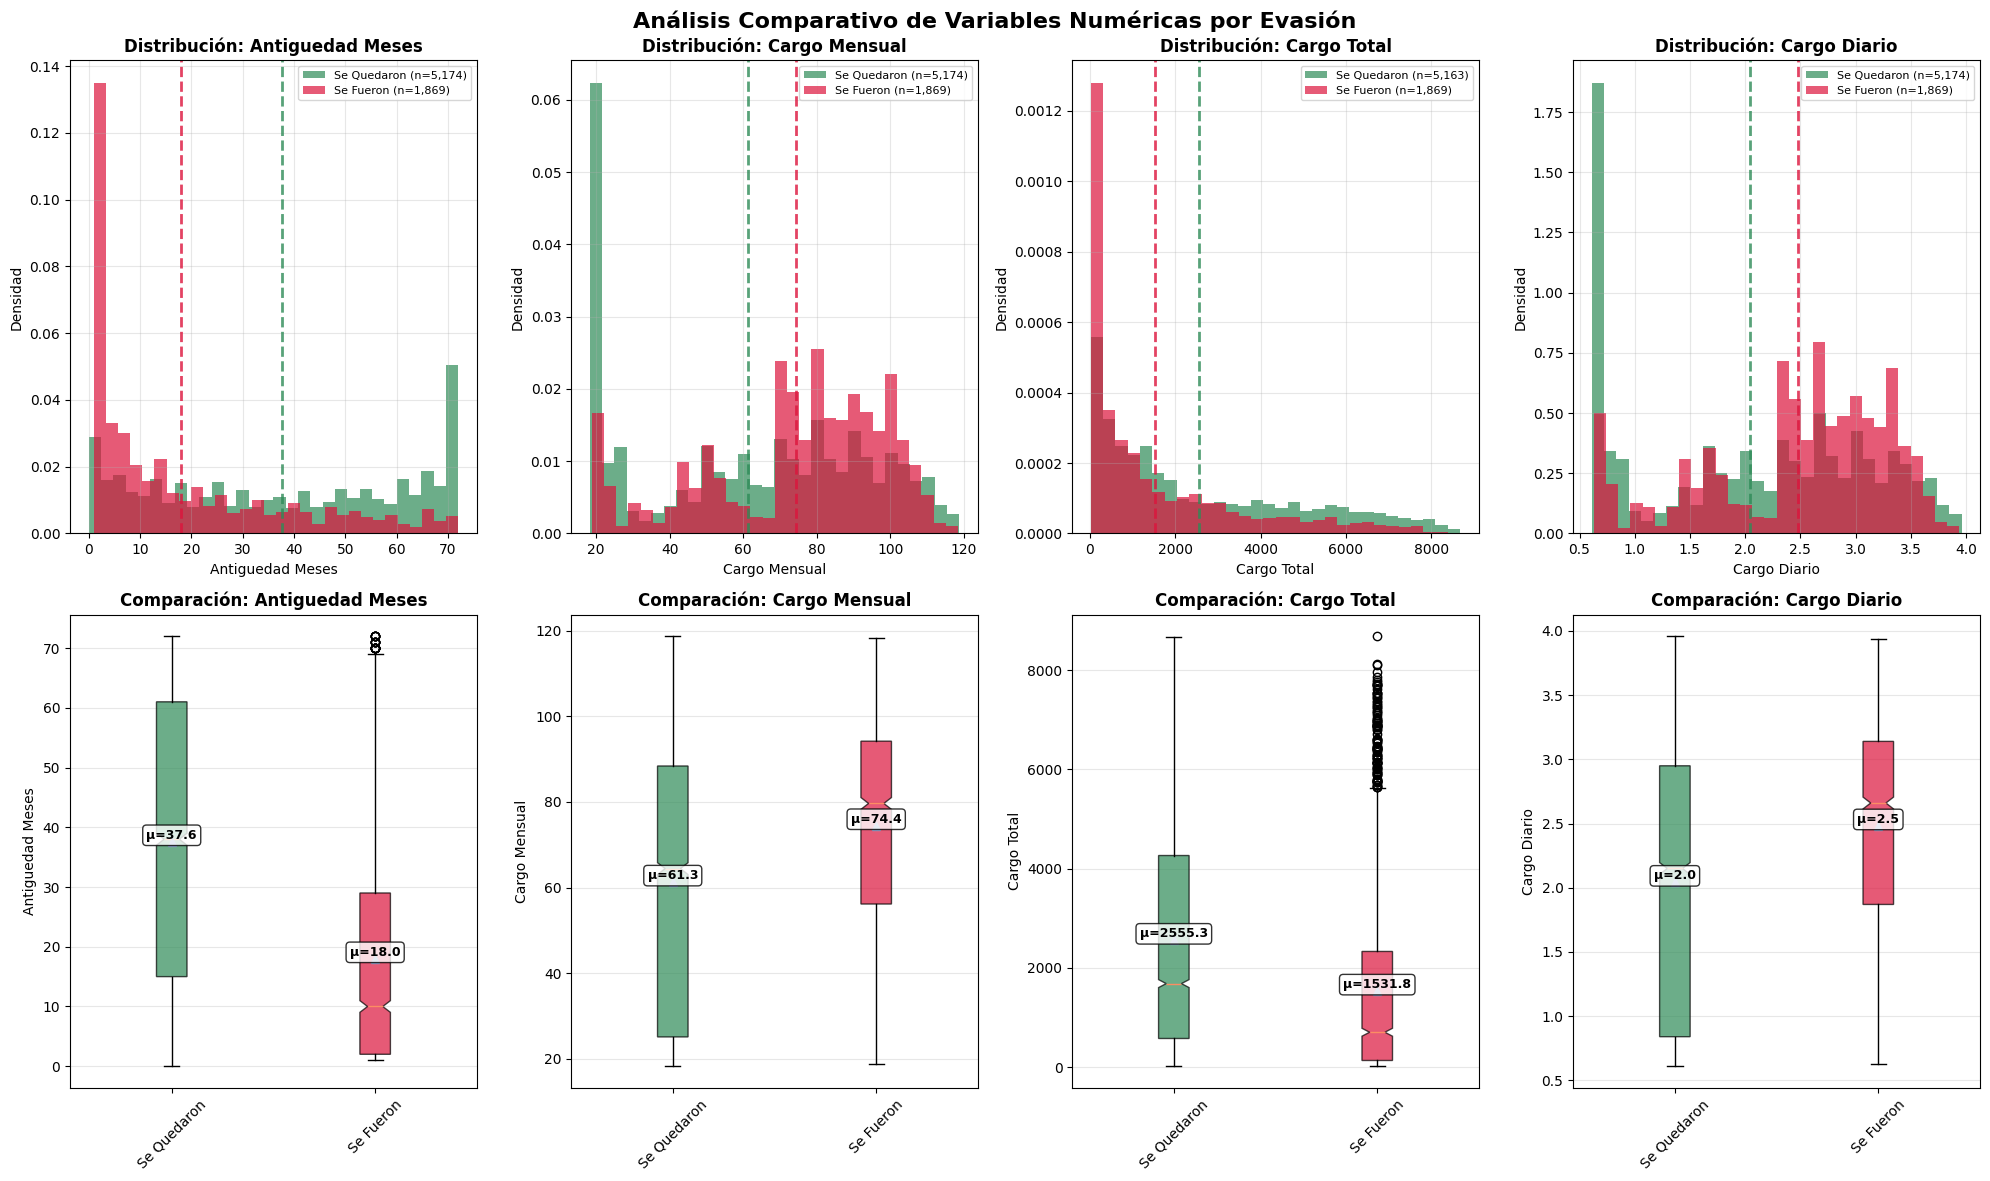

In [134]:
# 3. VISUALIZACIONES COMPARATIVAS

print(f"\n📊 3. GENERANDO VISUALIZACIONES COMPARATIVAS")
print("-" * 50)

# Crear figura con subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 12))
fig.suptitle('Análisis Comparativo de Variables Numéricas por Evasión', fontsize=16, fontweight='bold')

# Colores para los grupos
colores = ['#2E8B57', '#DC143C']  # Verde para se quedaron, Rojo para se fueron
labels = ['Se Quedaron', 'Se Fueron']

for i, variable in enumerate(variables_numericas):
    if variable in df_normalize.columns:

        # Subplot 1: Histogramas comparativos
        ax1 = axes[0, i]

        # Datos para histogramas
        data_quedaron = se_quedaron[variable].dropna()
        data_fueron = se_fueron[variable].dropna()

        # Histogramas superpuestos
        ax1.hist(data_quedaron, bins=30, alpha=0.7, color=colores[0],
                label=f'Se Quedaron (n={len(data_quedaron):,})', density=True)
        ax1.hist(data_fueron, bins=30, alpha=0.7, color=colores[1],
                label=f'Se Fueron (n={len(data_fueron):,})', density=True)

        # Líneas de media
        ax1.axvline(data_quedaron.mean(), color=colores[0], linestyle='--', linewidth=2, alpha=0.8)
        ax1.axvline(data_fueron.mean(), color=colores[1], linestyle='--', linewidth=2, alpha=0.8)

        ax1.set_title(f'Distribución: {variable.replace("_", " ")}', fontweight='bold')
        ax1.set_xlabel(variable.replace('_', ' '))
        ax1.set_ylabel('Densidad')
        ax1.legend(fontsize=8)
        ax1.grid(alpha=0.3)

        # Subplot 2: Box plots comparativos
        ax2 = axes[1, i]

        # Preparar datos para boxplot
        data_boxplot = [data_quedaron, data_fueron]

        box_plot = ax2.boxplot(data_boxplot, labels=labels, patch_artist=True,
                              notch=True, showmeans=True)

        # Colorear cajas
        for patch, color in zip(box_plot['boxes'], colores):
            patch.set_facecolor(color)
            patch.set_alpha(0.7)

        # Añadir valores estadísticos
        medias = [data_quedaron.mean(), data_fueron.mean()]
        for j, media in enumerate(medias):
            ax2.text(j+1, media, f'μ={media:.1f}', ha='center', va='bottom',
                    fontweight='bold', fontsize=9,
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

        ax2.set_title(f'Comparación: {variable.replace("_", " ")}', fontweight='bold')
        ax2.set_ylabel(variable.replace('_', ' '))
        ax2.grid(axis='y', alpha=0.3)

        # Rotar etiquetas si es necesario
        ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [135]:
# 4. ANÁLISIS DE CORRELACIÓN

print(f"\n📊 4. ANÁLISIS DE CORRELACIÓN CON CHURN")
print("-" * 50)

print("🔗 CORRELACIÓN DE PEARSON CON FUGA_CLIENTE:")
correlaciones = []

for variable in variables_numericas:
    if variable in df_normalize.columns:
        corr_coef = df_normalize[variable].corr(df_normalize['Fuga_Cliente'])
        correlaciones.append({
            'Variable': variable.replace('_', ' '),
            'Correlación': corr_coef,
            'Interpretación': 'Positiva' if corr_coef > 0 else 'Negativa',
            'Fuerza': 'Fuerte' if abs(corr_coef) > 0.3 else 'Moderada' if abs(corr_coef) > 0.1 else 'Débil'
        })

        print(f"   {variable.replace('_', ' '):<15}: {corr_coef:>7.4f} ({correlaciones[-1]['Fuerza']} {correlaciones[-1]['Interpretación']})")


📊 4. ANÁLISIS DE CORRELACIÓN CON CHURN
--------------------------------------------------
🔗 CORRELACIÓN DE PEARSON CON FUGA_CLIENTE:
   Antiguedad Meses: -0.3522 (Fuerte Negativa)
   Cargo Mensual  :  0.1934 (Moderada Positiva)
   Cargo Total    : -0.1995 (Moderada Negativa)
   Cargo Diario   :  0.1934 (Moderada Positiva)


In [136]:
# 5. INSIGHTS Y CONCLUSIONES

print(f"\n💡 5. INSIGHTS Y CONCLUSIONES CLAVE")
print("-" * 50)

print("🔍 HALLAZGOS PRINCIPALES:")

# Crear DataFrame de resultados para análisis
df_resultados = pd.DataFrame(resultados_numericos)
df_resultados_sorted = df_resultados.reindex(df_resultados['diferencia_percent'].abs().sort_values(ascending=False).index)

print(f"\n📊 RANKING POR IMPACTO (diferencia porcentual):")
for i, row in df_resultados_sorted.iterrows():
    direccion = "↗️ MAYOR" if row['diferencia_percent'] > 0 else "↘️ MENOR"
    print(f"   {row['variable'].replace('_', ' ')}: {direccion} {abs(row['diferencia_percent']):.1f}%")
    print(f"      └─ Media: Se Fueron {row['media_fueron']:.1f} vs Se Quedaron {row['media_quedaron']:.1f}")

print(f"\n🎯 IMPLICACIONES ESTRATÉGICAS:")

# Análisis de antigüedad
if 'Antiguedad_Meses' in df_normalize.columns:
    antigua_mean_churn = se_fueron['Antiguedad_Meses'].mean()
    antigua_mean_stay = se_quedaron['Antiguedad_Meses'].mean()

    if antigua_mean_churn < antigua_mean_stay:
        print(f"   🚨 RIESGO TEMPRANO: Clientes nuevos tienen mayor riesgo de fuga")
        print(f"      └─ Enfocar onboarding y primeros 6 meses")
    else:
        print(f"   ⏰ RIESGO TARDÍO: Clientes antiguos se van más")
        print(f"      └─ Programas de lealtad y renovación")

# Análisis de cargos
if 'Cargo_Mensual' in df_normalize.columns:
    cargo_mean_churn = se_fueron['Cargo_Mensual'].mean()
    cargo_mean_stay = se_quedaron['Cargo_Mensual'].mean()

    if cargo_mean_churn > cargo_mean_stay:
        print(f"   💰 SENSIBILIDAD AL PRECIO: Clientes con cargos altos se van más")
        print(f"      └─ Revisar estrategia de precios premium")
    else:
        print(f"   💸 COSTO-BENEFICIO: Clientes de bajo valor se van más")
        print(f"      └─ Mejorar propuesta de valor para segmento básico")


💡 5. INSIGHTS Y CONCLUSIONES CLAVE
--------------------------------------------------
🔍 HALLAZGOS PRINCIPALES:

📊 RANKING POR IMPACTO (diferencia porcentual):
   Antiguedad Meses: ↘️ MENOR 52.1%
      └─ Media: Se Fueron 18.0 vs Se Quedaron 37.6
   Cargo Total: ↘️ MENOR 40.1%
      └─ Media: Se Fueron 1531.8 vs Se Quedaron 2555.3
   Cargo Diario: ↗️ MAYOR 21.5%
      └─ Media: Se Fueron 2.5 vs Se Quedaron 2.0
   Cargo Mensual: ↗️ MAYOR 21.5%
      └─ Media: Se Fueron 74.4 vs Se Quedaron 61.3

🎯 IMPLICACIONES ESTRATÉGICAS:
   🚨 RIESGO TEMPRANO: Clientes nuevos tienen mayor riesgo de fuga
      └─ Enfocar onboarding y primeros 6 meses
   💰 SENSIBILIDAD AL PRECIO: Clientes con cargos altos se van más
      └─ Revisar estrategia de precios premium


#**📄Informe final**

## Análisis de Evasión de Clientes (Churn) - TelecomX

---

## 🎯 **1. INTRODUCCIÓN**

### **Contexto del Problema**
La evasión de clientes (Churn) representa uno de los desafíos más críticos en la industria de las telecomunicaciones. TelecomX enfrenta una **tasa de churn del 26.54%**, considerablemente superior al benchmark saludable del sector (15-20%), lo que indica una pérdida significativa de ingresos y valor de marca.

### **Objetivo del Análisis**
Este proyecto tiene como objetivo **identificar los factores críticos que impulsan la evasión de clientes** en TelecomX, mediante un análisis exhaustivo de datos que permita:
- Comprender los patrones de comportamiento de clientes que abandonan el servicio
- Identificar segmentos de alto riesgo
- Desarrollar estrategias de retención basadas en evidencia
- Crear un marco de trabajo para la toma de decisiones estratégicas

### **Impacto Esperado**
La reducción del churn del 26.54% actual a un 20% representaría:
- **Retención de aproximadamente 460 clientes adicionales por mes**
- **Incremento significativo en el valor de vida del cliente (CLV)**
- **Mejora en la rentabilidad y competitividad de la empresa**

---

## 🔧 **2. LIMPIEZA Y TRATAMIENTO DE DATOS**

### **2.1 Proceso de Extracción**
Los datos fueron extraídos desde un repositorio de GitHub en formato JSON, requiriendo un proceso de normalización debido a su estructura anidada con tres niveles principales:
- `customer`: Información demográfica del cliente
- `phone`: Servicios telefónicos
- `internet`: Servicios de internet
- `account`: Información de facturación y contratos

### **2.2 Calidad de Datos**
**Dataset Original:**
- **Registros iniciales:** 7,267
- **Registros eliminados:** 224 (con valores nulos en la variable objetivo 'Churn')
- **Dataset final:** 7,043 registros válidos
- **Tasa de completitud:** 96.9%

### **2.3 Transformaciones Realizadas**

#### **Standardización de Variables Categóricas**
```python
# Ejemplo de transformaciones aplicadas
Transformaciones_Binarias = {
    'Yes/No': {'Yes': 1, 'No': 0},
    'Male/Female': {'Male': 1, 'Female': 0},
    'No internet service': 0,
    'No phone service': 0
}
```

#### **Codificación de Variables Categóricas**
- **Servicio Internet:** No=0, DSL=1, Fibra Óptica=2
- **Tipo Contrato:** Mes a mes=0, Un año=1, Dos años=2
- **Método Pago:** Cheque electrónico=0, Postal=1, Transfer=2, Tarjeta=3

#### **Variables Derivadas**
- **Cargo_Diario:** Calculado como Cargo_Mensual ÷ 30 días
- **Renombrado completo:** Todas las variables traducidas al español para mejor comprensión

### **2.4 Validaciones Finales**
- **Tipos de datos:** Verificados y corregidos
- **Valores atípicos:** Identificados y evaluados (mantenidos por ser valores reales del negocio)
- **Consistencia:** Validada la coherencia entre variables relacionadas

---

## 📈 **3. ANÁLISIS EXPLORATORIO DE DATOS**

### **3.1 Distribución General del Churn**
- **Clientes que se quedaron:** 5,174 (73.46%)
- **Clientes que se fueron:** 1,869 (26.54%)
- **Clasificación:** ALTA según benchmarks de la industria (>20%)

### **3.2 Análisis de Variables Categóricas**

#### **🏆 Variables de Mayor Impacto (Top 3)**

**1. Tipo de Contrato (Diferencia: 39.9%)**
```
Mes a Mes:    42.7% churn  |████████████████████████████████████████████
Un Año:       11.3% churn  |████████████
Dos Años:      2.8% churn  |███
```

**2. Servicio Internet (Diferencia: 34.5%)**
```
Fibra Óptica: 41.9% churn  |██████████████████████████████████████████
DSL:          18.9% churn  |███████████████████
Sin Internet:  7.4% churn  |████████
```

**3. Método de Pago (Diferencia: 30.0%)**
```
Cheque Elect: 45.3% churn  |█████████████████████████████████████████████
Postal:       19.2% churn  |███████████████████
Transfer:     15.7% churn  |████████████████
Tarjeta:      15.2% churn  |███████████████
```

#### **📊 Variables Secundarias de Impacto**
- **Ciudadanos Mayores:** 41.7% vs 23.6% (Diferencia: 18.1%)
- **Facturación Digital:** 33.6% vs 16.4% (Diferencia: 17.2%)
- **Sin Seguridad Online:** 31.3% vs 14.6% (Diferencia: 16.7%)
- **Sin Soporte Técnico:** 31.2% vs 15.2% (Diferencia: 16.0%)

### **3.3 Análisis de Variables Numéricas**

#### **🔍 Correlaciones con Churn**
| Variable | Correlación | Interpretación |
|----------|-------------|----------------|
| **Antigüedad_Meses** | **-0.3522** | 🔴 Fuerte negativa |
| **Cargo_Total** | -0.1995 | 🟡 Moderada negativa |
| **Cargo_Mensual** | +0.1934 | 🟢 Moderada positiva |
| **Cargo_Diario** | +0.1934 | 🟢 Moderada positiva |

#### **📈 Estadísticas Comparativas**

**Antigüedad (Variable más crítica):**
- **Se Fueron:** 18.0 meses promedio (Mediana: 10.0)
- **Se Quedaron:** 37.6 meses promedio (Mediana: 38.0)
- **Diferencia:** -52.1% menos antigüedad

**Cargo Mensual (Paradoja Premium):**
- **Se Fueron:** $74.4 promedio
- **Se Quedaron:** $61.3 promedio
- **Diferencia:** +21.5% más pago mensual

### **3.4 Visualizaciones Clave**

Los análisis fueron respaldados por visualizaciones que incluyen:
- **Gráficos de barras** para variables categóricas con tasas de churn
- **Histogramas comparativos** para variables numéricas por grupo
- **Box plots** para análisis de distribuciones
- **Análisis estadísticos** para correlaciones numéricas


---

## 💡 **4. CONCLUSIONES E INSIGHTS**

### **4.1 Hallazgos Críticos**

#### **🚨 1. Paradoja del Cliente Premium**
Los clientes con mayor churn son paradójicamente los que más pagan:
- **Fibra Óptica:** 41.9% churn (servicio más caro)
- **Cargo mensual promedio:** $74.4  vs  $61.3
- **Implicación:** Los clientes premium tienen expectativas más altas y menor tolerancia a problemas de servicio

#### **⏰ 2. Ventana Crítica de Retención**
Los primeros 18 meses son decisivos:
- **Correlación más fuerte:** Antigüedad (-0.3522)
- **Clientes en riesgo:** Antigüedad < 18 meses
- **Implicación:** El período de onboarding y primeros contactos es crítico

#### **🔄 3. Efecto del Compromiso**
La falta de compromisos contractuales facilita la fuga:
- **Contratos mes a mes:** 42.7% churn
- **Pago manual:** 45.3% churn
- **Implicación:** Los mecanismos de compromiso reducen significativamente el riesgo

#### **👥 4. Perfiles Demográficos de Riesgo**
Ciertos segmentos demográficos son inherentemente más volátiles:
- **Ciudadanos mayores:** 41.7% churn
- **Sin dependientes:** 31.3% churn
- **Implicación:** Necesidad de estrategias de retención segmentadas

### **4.2 Patrones Identificados**

#### **Perfil de Cliente de Alto Riesgo:**
- Contrato mes a mes
- Servicio de fibra óptica
- Pago con cheque electrónico
- Ciudadano mayor
- Sin dependientes
- Menos de 18 meses de antigüedad
- Cargo mensual > $70

#### **Perfil de Cliente Estable:**
- Contrato de 1-2 años
- Servicios básicos (DSL o sin internet)
- Pago automático
- Con dependientes
- Más de 2 años de antigüedad
- Servicios adicionales de seguridad/soporte

### **4.3 Impacto en el Negocio**

**Pérdida Estimada Actual:**
- **1,869 clientes perdidos** en el período analizado
- **Valor promedio perdido:** $74.4 × 12 meses = $892.8 por cliente/año
- **Impacto anual estimado:** $1.67 millones en ingresos perdidos

---

## 🚀 **5. RECOMENDACIONES ESTRATÉGICAS**

### **5.1 Acciones Inmediatas (0-30 días)**

#### **🎯 1. Programa de Onboarding (proceso de integración y bienvenida de nuevos clientes) Intensivo**
- **Target:** Clientes con <6 meses de antigüedad
- **Acciones:**
  - Seguimiento telefónico semanal primeros 3 meses
  - Tutoriales personalizados por servicio
  - Soporte técnico prioritario
- **KPI:** Reducir churn en nuevos clientes de 40% a <25%
- **Inversión estimada:** $50 por cliente nuevo

#### **💰 2. Revisión de Estrategia Premium**
- **Target:** Clientes fibra óptica (41.9% churn)
- **Acciones:**
  - Auditoría de calidad de servicio fibra
  - Mejora en SLA y tiempos de respuesta
  - Descuentos por fidelidad en servicios premium
- **KPI:** Reducir churn fibra de 41.9% a <30%

#### **📄 3. Migración a Contratos Largos**
- **Target:** 3,875 clientes mes a mes
- **Acciones:**
  - Descuentos progresivos por contratos anuales (10-15%)
  - Servicios adicionales gratuitos en contratos bianuales
  - Campaña de concientización sobre beneficios
- **KPI:** Migrar 50% a contratos largos en 6 meses

### **5.2 Estrategias de Mediano Plazo (30-90 días)**

#### **🏦 4. Automatización de Pagos**
- **Target:** Clientes con cheque electrónico (45.3% churn)
- **Acciones:**
  - Incentivos económicos por débito automático ($5-10/mes)
  - Proceso simplificado de cambio de método de pago
  - Educación sobre beneficios de automatización
- **KPI:** 80% migración a pago automático

#### **👴 5. Programa Especializado Seniors**
- **Target:** Ciudadanos mayores (41.7% churn)
- **Acciones:**
  - Línea de soporte técnico especializada
  - Tarifas preferenciales para mayores de 65
  - Capacitaciones presenciales en centros comunitarios
- **KPI:** Reducir churn senior a <30%

#### **🎁 6. Programa de Valor Agregado**
- **Target:** Clientes sin servicios adicionales
- **Acciones:**
  - Bundling inteligente de servicios
  - Períodos de prueba gratuitos (seguridad, soporte)
  - Cross-selling basado en perfil de uso
- **KPI:** Incrementar adopción de servicios adicionales en 40%

---

**📅 Fecha del Informe:** Agosto 2025  
**👥 Equipo de Análisis:** Londero Guillermo Data Science

**👨‍💼 Cliente:** ONE + Alura LATAM
